> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [42]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

#Importint all the neccesary packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv 
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in a nicer way than the base print function.

%matplotlib inline
pd.options.display.float_format = '{: .2f}'.format

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

Steps to perform:
- Check how the data looks like with .head()
- Check the data types of the dataset with .info(), look for any kind of mismatch (like numeric data having object type)
- Check for any missing data
- Check for any irrelevant data (rows or colums) that should be removed

# CHECKING THE CENSUS DATA#

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# Load census data as df_census and show top rows
pd.read_csv('us_census_data.csv', header=None).T.to_csv('us_census_data_transposed.csv', header=False, index=False) 
#The data had to be transposed for better analysis

#Check the top rows of the data
df_cen_pure = pd.read_csv('us_census_data_transposed.csv')
df_cen_pure.head()

,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,Unnamed: 76,Value Flags,-,D,F,FN,Unnamed: 82,S,X,Z
0,Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_cen_pure.info() #Check the data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 86 columns):
Fact                                                                                      51 non-null object
Population estimates, July 1, 2016,  (V2016)                                              50 non-null object
Population estimates base, April 1, 2010,  (V2016)                                        50 non-null object
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     50 non-null object
Population, Census, April 1, 2010                                                         50 non-null object
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    50 non-null object
Persons under 5 years, percent, April 1, 2010                                             50 non-null object
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   50 non-null object
Persons under 18 years, p

# Conclusion about the CENSUS data#

Census data needs to be further cleaned:
- most of the numeric data is string, has to be changed to int or float
- because of tranposing the original data source, several columns has to be cut
- fact note row needs to be removed from the analysis
- there are 0-1 missing values per columns, which has to be inputed

# Data cleaning below:

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Clean Census data 1 - remove excess columns
df_cen_clean = pd.read_csv('us_census_data_transposed.csv', usecols = [i for i in range(66)])


In [6]:
df_cen_clean.rename(columns = {'Fact': 'State'}, inplace = True) #rename Fact to State
df_cen_clean = df_cen_clean.drop([0]) #remove fact note row
df_cen_state = df_cen_clean.iloc[0:,:1] #split table to string type and numeric type columns
df_cen_clean = df_cen_clean.iloc[0:,1:].replace({',': '', '%':'','\$':'','\"':'','Z':0, 'D':None, 'NA':None, 'FN':None, 'S':None}, regex=True)
# according to the value flags, some of the alphabetical values had to be changed either to numerical or None

In [7]:
df_cen_clean = df_cen_clean.iloc[0:,1:].apply(pd.to_numeric)

In [8]:
cols = df_cen_clean.columns.tolist() #get column names

#append column names to state
df_cen_state[cols]=df_cen_clean
df_cens = df_cen_state

df_cens.head()


,State,"Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
1,Alabama,4780131,1.70,4779736,6.00,6.40,22.60,23.70,16.10,13.80,...,374153,203604,137630,92219,272651,41943,316984,94.40,50645.33,1
2,Alaska,710249,4.50,710231,7.30,7.60,25.20,26.40,10.40,7.70,...,68032,35402,22141,13688,51147,7953,56091,1.20,570640.95,2
3,Arizona,6392301,8.40,6392017,6.30,7.10,23.50,25.50,16.90,13.80,...,499926,245243,182425,135313,344981,46780,427582,56.30,113594.08,4
4,Arkansas,2916025,2.50,2915918,6.40,6.80,23.60,24.40,16.30,14.40,...,231959,123158,75962,35982,189029,25915,192988,56.00,52035.48,5
5,California,37254522,5.40,37253956,6.30,6.80,23.20,25.00,13.60,11.40,...,3548449,1852580,1320085,1619857,1819107,252377,3176341,239.10,155779.22,6


In [9]:
df_cens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 65 columns):
State                                                                                     50 non-null object
Population estimates base, April 1, 2010,  (V2016)                                        50 non-null int64
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     50 non-null float64
Population, Census, April 1, 2010                                                         50 non-null int64
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    50 non-null float64
Persons under 5 years, percent, April 1, 2010                                             50 non-null float64
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   50 non-null float64
Persons under 18 years, percent, April 1, 2010                                            50 non-null float64
Persons 65 years and o

In [10]:
df_cens_stats = df_cens.describe().transpose()
df_cens_stats.head(65)

,count,mean,std,min,25%,50%,75%,max
"Population estimates base, April 1, 2010, (V2016)",50.00,6163126.78,6848463.26,563767.00,1833003.25,4436411.50,6680362.00,37254522.00
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",50.00,3.12,3.37,-1.20,0.07,2.05,5.07,10.80
"Population, Census, April 1, 2010",50.00,6162876.30,6848235.35,563626.00,1833004.25,4436369.50,6680312.25,37253956.00
"Persons under 5 years, percent, July 1, 2016, (V2016)",50.00,4.70,2.70,0.05,4.82,6.00,6.40,8.30
"Persons under 5 years, percent, April 1, 2010",50.00,5.02,2.90,0.06,5.12,6.35,6.80,9.50
"Persons under 18 years, percent, July 1, 2016, (V2016)",50.00,17.43,9.94,0.20,19.02,22.25,23.45,30.20
"Persons under 18 years, percent, April 1, 2010",50.00,18.34,10.43,0.21,20.70,23.50,24.55,31.50
"Persons 65 years and over, percent, July 1, 2016, (V2016)",50.00,11.81,6.85,0.14,10.43,15.00,16.10,19.90
"Persons 65 years and over, percent, April 1, 2010",50.00,9.99,5.81,0.13,8.03,12.45,13.80,17.30
"Female persons, percent, July 1, 2016, (V2016)",50.00,38.51,21.58,0.49,48.00,50.30,50.90,51.60


In [11]:
# save csv to a new file to avoid further load of the cleaning scripts --> Checkpoint
df_cens.to_csv('us_census_data_cleaned.csv', index = False)

# CHECKING THE GUNS DATA#


In [12]:
df_gun = pd.read_excel('gun_data.xlsx')
df_gun.head() #Check the top rows of the data

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.00,0.00,5734.00,6320.00,221.00,317,0.00,15.00,...,0.00,0.00,0.00,9.00,16.00,3.00,0.00,0.00,3.00,32019
1,2017-09,Alaska,209.00,2.00,2320.00,2930.00,219.00,160,0.00,5.00,...,0.00,0.00,0.00,17.00,24.00,1.00,0.00,0.00,0.00,6303
2,2017-09,Arizona,5069.00,382.00,11063.00,7946.00,920.00,631,0.00,13.00,...,0.00,0.00,0.00,38.00,12.00,2.00,0.00,0.00,0.00,28394
3,2017-09,Arkansas,2935.00,632.00,4347.00,6063.00,165.00,366,51.00,12.00,...,0.00,0.00,0.00,13.00,23.00,0.00,0.00,2.00,1.00,17747
4,2017-09,California,57839.00,0.00,37165.00,24581.00,2984.00,0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,123506


In [13]:
df_gun.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.00,nan,14.00,2.00,nan,8,0.00,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,24
12481,1998-11,Washington,1.00,nan,65.00,286.00,nan,8,1.00,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,361
12482,1998-11,West Virginia,3.00,nan,149.00,251.00,nan,5,0.00,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,408
12483,1998-11,Wisconsin,0.00,nan,25.00,214.00,nan,2,0.00,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,241
12484,1998-11,Wyoming,8.00,nan,45.00,49.00,nan,5,0.00,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,107


In [14]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

Since the gun data is a time-series based one, some filtering needs to be done to be relevant and comparable with the census data. Census data has data from 2016, therefore a filtering for the 2016 gun data entries is needed:

In [15]:
df_gun['year'] = df_gun['month'].str[:4]

In [16]:
df_gun['year'] = df_gun['year'].astype('int32')

In [17]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 28 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [18]:
df_gun.query('year == 2016', inplace=True)
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 495 to 1154
Data columns (total 28 columns):
month                        660 non-null object
state                        660 non-null object
permit                       660 non-null float64
permit_recheck               605 non-null float64
handgun                      660 non-null float64
long_gun                     660 non-null float64
other                        660 non-null float64
multiple                     660 non-null int64
admin                        660 non-null float64
prepawn_handgun              660 non-null float64
prepawn_long_gun             660 non-null float64
prepawn_other                660 non-null float64
redemption_handgun           660 non-null float64
redemption_long_gun          660 non-null float64
redemption_other             660 non-null float64
returned_handgun             660 non-null float64
returned_long_gun            660 non-null float64
returned_other               660 non-null floa

In [19]:
#get totals column (as a sum of all the background checks) for each state summarized
gun_totals_2016 = pd.pivot_table(df_gun, index = 'state', values = 'totals')
gun_totals_2016 = gun_totals_2016.reset_index()

In [20]:
gun_totals_2016_stats = gun_totals_2016.describe().transpose()
gun_totals_2016_stats.head()

,count,mean,std,min,25%,50%,75%,max
totals,55.00,41553.81,55760.74,1.42,9312.62,23013.42,50601.25,306403.92


In [21]:
# save csv to a new file to avoid further load of the cleaning scripts --> Checkpoint
gun_totals_2016.to_csv('gun_data_cleaned.csv', index = False)

# Conclusion about the GUN data#

GUN data needs to be further cleaned:
- data types seems to be correct
- table has data from many years, to make it comparable it was filtered to 2016 entries
- yearly totals have been summed up by state --> this can be tested against certain census data

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 - Which 

In [22]:
#Load both clean datasets
df_cens = pd.read_csv('us_census_data_cleaned.csv')
df_guns = pd.read_csv('gun_data_cleaned.csv')
df_guns.head()

,state,totals
0,Alabama,51412.25
1,Alaska,7303.92
2,Arizona,34689.92
3,Arkansas,22167.83
4,California,198097.25


In [23]:
df_cens = df_cens.set_index('State', drop=False).iloc[0:,0:]
df_guns = df_guns.set_index('state', drop=False).iloc[0:,0:]

In [24]:
df_guns.head()

,state,totals
state,,
Alabama,Alabama,51412.25
Alaska,Alaska,7303.92
Arizona,Arizona,34689.92
Arkansas,Arkansas,22167.83
California,California,198097.25


In [25]:
df_cens.head()

,State,"Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
State,,,,,,,,,,,,,,,,,,,,,
Alabama,Alabama,4780131,1.70,4779736,6.00,6.40,22.60,23.70,16.10,13.80,...,374153,203604,137630,92219,272651,41943,316984,94.40,50645.33,1
Alaska,Alaska,710249,4.50,710231,7.30,7.60,25.20,26.40,10.40,7.70,...,68032,35402,22141,13688,51147,7953,56091,1.20,570640.95,2
Arizona,Arizona,6392301,8.40,6392017,6.30,7.10,23.50,25.50,16.90,13.80,...,499926,245243,182425,135313,344981,46780,427582,56.30,113594.08,4
Arkansas,Arkansas,2916025,2.50,2915918,6.40,6.80,23.60,24.40,16.30,14.40,...,231959,123158,75962,35982,189029,25915,192988,56.00,52035.48,5
California,California,37254522,5.40,37253956,6.30,6.80,23.20,25.00,13.60,11.40,...,3548449,1852580,1320085,1619857,1819107,252377,3176341,239.10,155779.22,6


In [26]:
#Combine Data:
combined_data = pd.concat([df_cens, df_guns], axis=1, join="inner", sort=False)
combined_data.tail()
#I kept both the State (census) and state (gun) columns to be sure the concat function run well.


,State,"Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,state,totals
Virginia,Virginia,8001041,5.10,8001024,6.10,6.40,22.20,23.20,14.60,12.20,...,236290,185043,450109,76434,548439,202.60,39490.09,51,Virginia,44030.75
Washington,Washington,6724545,8.40,6724540,6.20,6.50,22.40,23.50,14.80,12.30,...,187677,92807,426697,49331,461401,101.20,66455.52,53,Washington,59499.67
West Virginia,West Virginia,1853011,-1.20,1852994,5.50,5.60,20.50,20.90,18.80,16.00,...,39065,5777,104785,12912,94960,77.10,24038.21,54,West Virginia,20195.83
Wisconsin,Wisconsin,5687289,1.60,5686986,5.80,6.30,22.30,23.60,16.10,13.70,...,133859,40507,379934,39830,370755,105.00,54157.80,55,Wisconsin,46818.25
Wyoming,Wyoming,563767,3.90,563626,6.50,7.10,23.70,24.00,15.00,12.40,...,19344,4077,55397,6470,51353,5.80,97093.14,56,Wyoming,5299.50


In [27]:
df = combined_data.drop(columns=['State', 'state'])

In [28]:
df.head()

,"Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)",...,"Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,totals
Alabama,4780131,1.70,4779736,6.00,6.40,22.60,23.70,16.10,13.80,51.60,...,203604,137630,92219,272651,41943,316984,94.40,50645.33,1,51412.25
Alaska,710249,4.50,710231,7.30,7.60,25.20,26.40,10.40,7.70,47.70,...,35402,22141,13688,51147,7953,56091,1.20,570640.95,2,7303.92
Arizona,6392301,8.40,6392017,6.30,7.10,23.50,25.50,16.90,13.80,50.30,...,245243,182425,135313,344981,46780,427582,56.30,113594.08,4,34689.92
Arkansas,2916025,2.50,2915918,6.40,6.80,23.60,24.40,16.30,14.40,50.90,...,123158,75962,35982,189029,25915,192988,56.00,52035.48,5,22167.83
California,37254522,5.40,37253956,6.30,6.80,23.20,25.00,13.60,11.40,50.30,...,1852580,1320085,1619857,1819107,252377,3176341,239.10,155779.22,6,198097.25


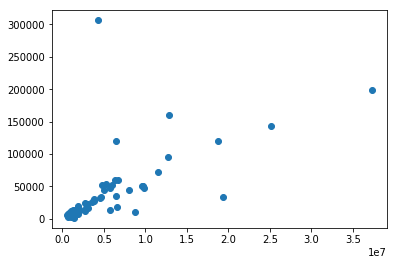

In [29]:
#explore census data
plt.scatter(df['Population estimates base, April 1, 2010,  (V2016)'], df['totals'])


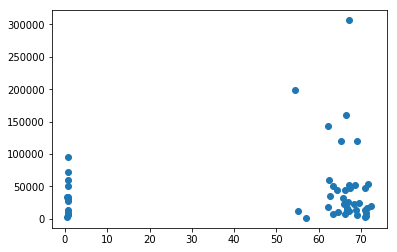

In [30]:
plt.scatter(df['Owner-occupied housing unit rate, 2011-2015'], df['totals'])

In [54]:
census_header = df_cens.columns.tolist()
pprint(census_header) #list the column headers to make it easier to pick for scatterplot testing

['State',
 'Population estimates base, April 1, 2010,  (V2016)',
 'Population, percent change - April 1, 2010 (estimates base) to July 1, '
 '2016,  (V2016)',
 'Population, Census, April 1, 2010',
 'Persons under 5 years, percent, July 1, 2016,  (V2016)',
 'Persons under 5 years, percent, April 1, 2010',
 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
 'Persons under 18 years, percent, April 1, 2010',
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
 'Persons 65 years and over, percent, April 1, 2010',
 'Female persons, percent,  July 1, 2016,  (V2016)',
 'Female persons, percent, April 1, 2010',
 'White alone, percent, July 1, 2016,  (V2016)',
 'Black or African American alone, percent, July 1, 2016,  (V2016)',
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
 'Asian alone, percent, July 1, 2016,  (V2016)',
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  '
 '(V2016)',
 'Two or More Races, percent, July 

In [102]:
list_of_figures = ['Veterans, 2011-2015',
                   'Population estimates base, April 1, 2010,  (V2016)',
                   'Per capita income in past 12 months (in 2015 dollars), 2011-2015','Persons in poverty, percent',
                   'Bachelor\'s degree or higher, percent of persons age 25 years+, 2011-2015',
                   'Total employment, percent change, 2014-2015',
                   'White alone, percent, July 1, 2016,  (V2016)',
                   'Black or African American alone, percent, July 1, 2016,  (V2016)',
                   'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
                   'Asian alone, percent, July 1, 2016,  (V2016)',
                   'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
                   'Population per square mile, 2010',
                   'Persons under 18 years, percent, April 1, 2010',
                   'Median value of owner-occupied housing units, 2011-2015',
                   'High school graduate or higher, percent of persons age 25 years+, 2011-2015']

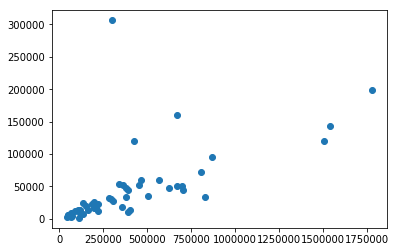

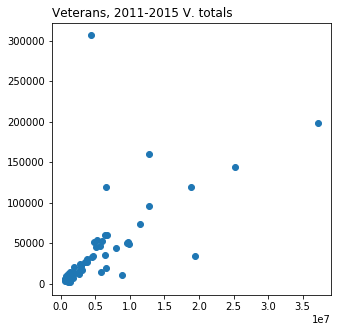

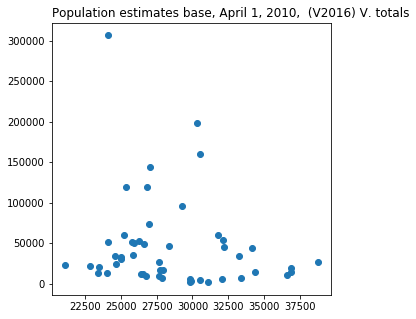

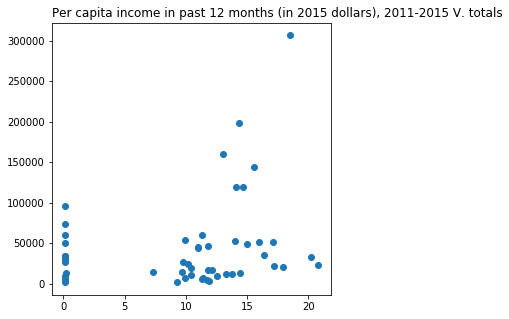

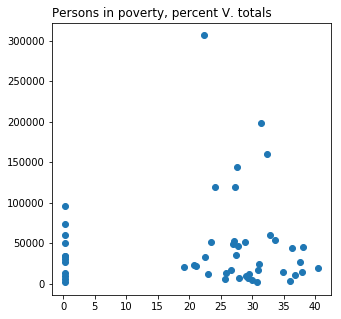

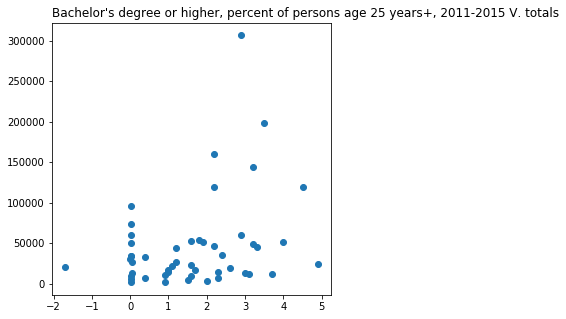

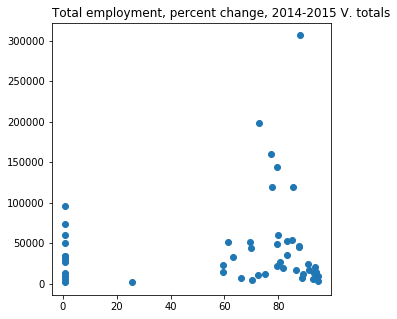

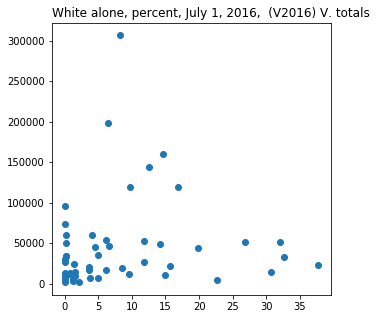

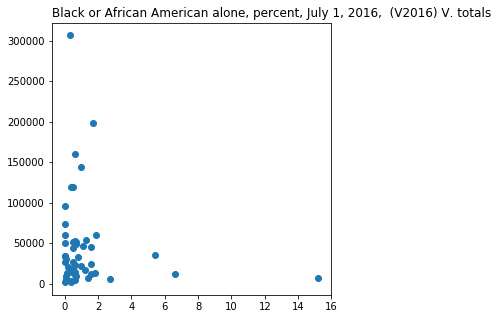

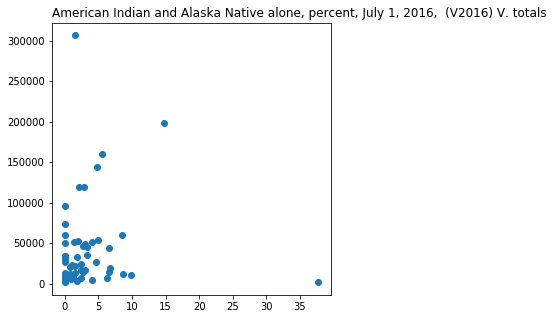

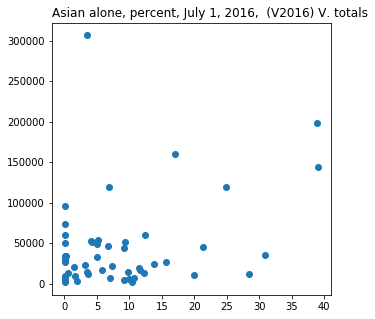

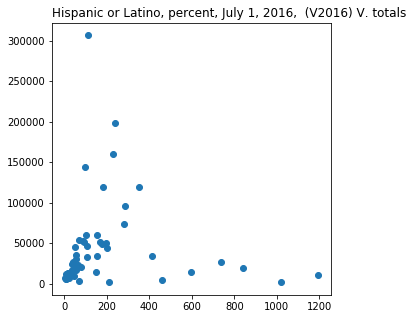

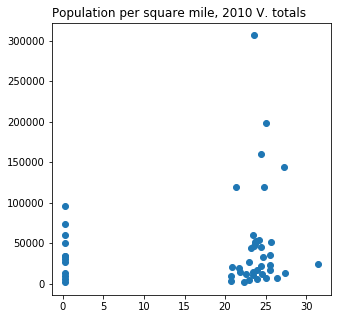

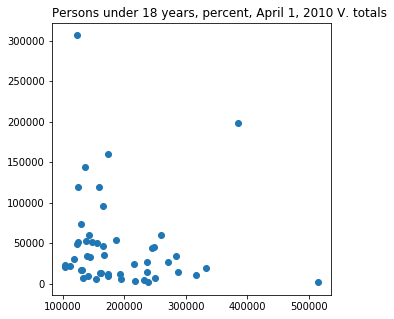

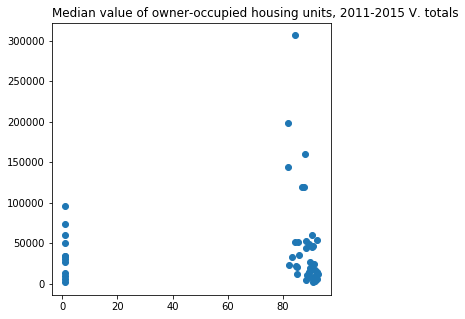

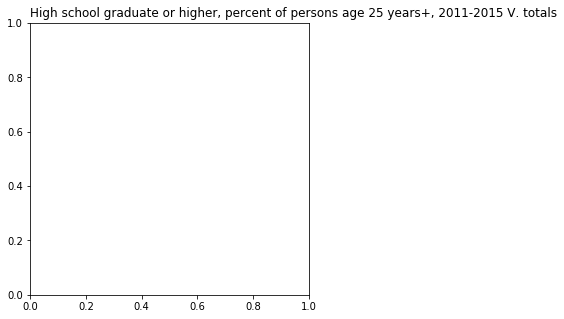

In [103]:
for item in list_of_figures:
    plt.scatter(df[item], df['totals'])
    plt.figure(figsize=(5,5))
    plt.title(item + ' V. totals', loc='left')

In [81]:
#pd.plotting.scatter_matrix(df[list_of_figures], alpha=1, figsize=(50, 50))


### Research Question 2  - How is the Crminal background check changed distributed among states?

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])